<a href="https://colab.research.google.com/github/joaorafaelm/notebooks/blob/master/cnn_for_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural networks for image classification


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

## mnist dataset

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
"dataset shape", x_train.shape

('dataset shape', (60000, 28, 28))

## single image

('single image shape', (28, 28))

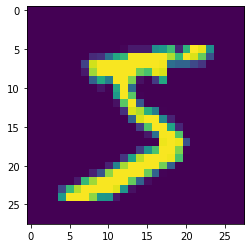

In [13]:
single_image = x_train[0]
plt.imshow(single_image)
"single image shape", single_image.shape

## label


In [20]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

# normalize

max and min values 255 0


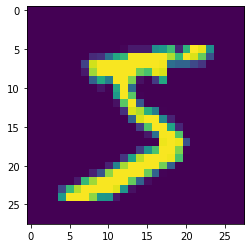

In [30]:
print("max and min values", single_image.max(), single_image.min())
x_train = x_train/255
x_test = x_test/255
plt.imshow(x_train[0]);

# rescale to include dimension 

In [38]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

## model

In [39]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(
    Conv2D(
        filters=32, kernel_size=(4, 4),
        input_shape=(28, 28, 1), activation="relu",
    )
)

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation="relu"))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation="softmax"))

# https://keras.io/metrics/
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


## train

In [40]:
early_stop = EarlyStopping(monitor="val_loss", patience=2)
model.fit(
    x_train,y_cat_train,
    epochs=10,
    validation_data=(x_test, y_cat_test),
    callbacks=[early_stop]
)

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.7344 - accuracy: 0.7804 - val_loss: 0.3335 - val_accuracy: 0.9028
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3112 - accuracy: 0.9065 - val_loss: 0.2580 - val_accuracy: 0.9233
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2508 - accuracy: 0.9247 - val_loss: 0.2121 - val_accuracy: 0.9379
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2090 - accuracy: 0.9371 - val_loss: 0.1843 - val_accuracy: 0.9455
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1800 - accuracy: 0.9471 - val_loss: 0.1663 - val_accuracy: 0.9503
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1597 - accuracy: 0.9525 - val_loss: 0.1472 - val_accuracy: 0.9568
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1451 - accuracy: 0.9570 - val_loss: 0.1330 -

## Evaluation

['loss', 'accuracy']
[0.11802619695663452, 0.9652000069618225]


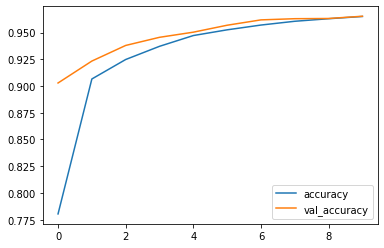

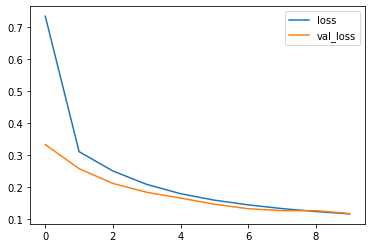

In [44]:
losses = pd.DataFrame(model.history.history)
losses[["accuracy","val_accuracy"]].plot()
losses[["loss","val_loss"]].plot()
print(model.metrics_names)
print(model.evaluate(x_test, y_cat_test, verbose=0))

In [45]:
predictions = model.predict_classes(x_test)
print(classification_report(y_test, predictions))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.94      0.96      0.95      1010
           4       0.97      0.96      0.97       982
           5       0.98      0.93      0.95       892
           6       0.98      0.97      0.98       958
           7       0.95      0.97      0.96      1028
           8       0.94      0.96      0.95       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg    

In [46]:
confusion_matrix(y_test,predictions)

array([[ 967,    0,    1,    1,    1,    2,    2,    2,    1,    3],
       [   0, 1122,    2,    1,    0,    1,    1,    5,    3,    0],
       [   5,    1,  996,    8,    4,    0,    2,    7,    9,    0],
       [   0,    2,    8,  973,    1,    2,    0,   12,    8,    4],
       [   0,    0,    7,    0,  945,    0,    2,    4,    2,   22],
       [   2,    3,    0,   20,    1,  834,    6,    3,   19,    4],
       [   3,    4,    1,    2,    4,    6,  932,    0,    6,    0],
       [   0,    5,   12,    2,    2,    1,    0,  996,    1,    9],
       [   1,    0,    6,   13,    6,    5,    3,    2,  937,    1],
       [   3,    6,    2,   12,   11,    4,    1,   13,    7,  950]])

## Test

array([7])

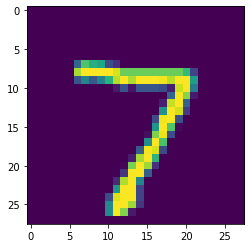

In [47]:
my_number = x_test[0]
plt.imshow(my_number.reshape(28,28))
model.predict_classes(my_number.reshape(1,28,28,1))